In [138]:
using JuMP
using Clp
using Cbc
using LinearAlgebra
using Ipopt
using Images, ImageView, StatsBase
using Combinatorics
using Plots

iteration_count = 0
tamanho_grid = 4

img_rgb = rand(RGB, tamanho_grid, tamanho_grid)

# Torna 50% das mesas vazias
empty_tables = sample(1:length(img_rgb), Integer(length(img_rgb)/2), replace = false)

for i in eachindex(img_rgb)
    if i in empty_tables
        img_rgb[i] = RGB(1.0, 1.0, 1.0) # Mesas brancas
    else    
        img_rgb[i] = RGB(0.0, 1.0, 0.0) # Mesas verdes
    end
end

#ImageView.imshow(img_rgb)

iteration = Vector{Float64}()
list_median_satisfaction = Vector{Float64}()

satisfaction = zeros(4,4)

i = 1
j = 1
# cria uma matriz 4x4 que define a satisfacao de cada mesa
for it in img_rgb
    if it == RGB{Float64}(0.0,1.0,0.0)
        satisfaction[i,j] = 5
    end
    if i == tamanho_grid
        i = 0
        j = j+1
    end
    if  i != tamanho_grid
        i=i+1
    end
end

print("Soma satisfação: ", sum(satisfaction[i,j] for i=1:4, j=1:4), "\n")


i = 1
j = 1

# cria uma matriz  4x4 que define o custo de cada mesa 

satisfaction = transpose(satisfaction)

imagem_dos_caminhos = rand(RGB, tamanho_grid, tamanho_grid)

# Torna 50% das mesas vazias
empty_tables_ = 0

for i in eachindex(imagem_dos_caminhos)
    if i in empty_tables_
        imagem_dos_caminhos[i] = RGB(1.0, 1.0, 1.0) # Mesas brancas
    else    
        imagem_dos_caminhos[i] = RGB(0.0, 1.0, 0.0) # Mesas verdes
    end
end
 
#ImageView.imshow(imagem_dos_caminhos)

#fazendo os caminhos possíveis aqui
i = 1
j = 1

evaluacao = zeros(tamanho_grid,tamanho_grid)

for it in imagem_dos_caminhos
    if it == RGB{Float64}(0.0,1.0,0.0)
        evaluacao[i,j] = 5
    end
    if i == tamanho_grid
        i = 0
        j = j+1
    end
    if  i != tamanho_grid
        i=i+1
    end
end


i = 1
j = 1
caminhos_possiveis = zeros(tamanho_grid*tamanho_grid,tamanho_grid*tamanho_grid)

# Crio todos os caminhos possiveis de se fazer quando voce está em um ponto, impedindo que você atravesse o restaurante em um unico movimento
for it in evaluacao
    if it == 5
        if i == 1  
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-0), i ] = 1
        
        elseif 1 < i &&  i < tamanho_grid
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1), i ] = 1
            caminhos_possiveis[i+((tamanho_grid+1)), i ] = 1
        
        elseif i == tamanho_grid
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1), i ] = 1
        
        elseif rem(i, tamanho_grid) == 1 && div(i, tamanho_grid) < (tamanho_grid-1)
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1),i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)), i] = 1
        
        elseif rem(i, tamanho_grid) == 1 && div(i, tamanho_grid) == (tamanho_grid-1)
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1),i] = 1
        
        elseif  (tamanho_grid*tamanho_grid)-(tamanho_grid-1) < i && i < (tamanho_grid*tamanho_grid)
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1), i ] = 1
            caminhos_possiveis[i-((tamanho_grid+1)), i ] = 1
        
        elseif i == (tamanho_grid*tamanho_grid)
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1), i ] = 1
            caminhos_possiveis[i-((tamanho_grid+1)), i ] = 1
        
        elseif  rem(i, tamanho_grid) == 0
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1),i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)), i] = 1

        else 
            caminhos_possiveis[i,i] = 1
            caminhos_possiveis[i-1, i] = 1
            caminhos_possiveis[i+1, i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)-1),i] = 1
            caminhos_possiveis[i+((tamanho_grid+1)), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-2), i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)-1),i] = 1
            caminhos_possiveis[i-((tamanho_grid+1)), i] = 1
        end
    end
    
    i = i+1
end

print("Matriz com todos os caminhos possíveis: \n")
caminhos_possiveis


Soma satisfação: 40.0
Matriz com todos os caminhos possíveis: 


16×16 Array{Float64,2}:
 1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  …  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0     1.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0     1.0  1.0  0.0  1.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  …  1.0  1.0  1.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

5.02.01.03.05.04.01.05.05.00.00.01.05.00.00.01.0[1.0 1.0 1.0 1.0; 2.0 1.0 0.0 0.0; 2.0 2.0 0.0 0.0; 2.0 1.0 2.0 2.0]Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 4 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -4 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and creat

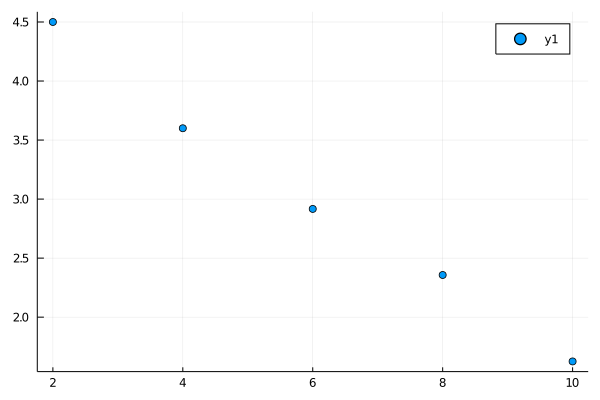

In [143]:
n = tamanho_grid
custo_simples = zeros(tamanho_grid,tamanho_grid)
pizzas = 4
mesas_vazias = zeros(tamanho_grid,tamanho_grid)

interation = 1
for i in satisfaction
    print(i)
    if 4<= i <= 5.0
    custo_simples[interation] = 1
    elseif 0< i<= 3
        custo_simples[interation] = 2
    end
    interation = interation+1
end
print(custo_simples)


if length(findall(a->a==1, custo_simples)) <= pizzas
    pizzas = length(findall(a->a==1, custo_simples))

end



nmodel =  Model(Cbc.Optimizer)
@variable(nmodel, x[1:n, 1:n], Bin)
@objective(nmodel,  Max, sum(x[i,j]*transpose(custo_simples)[i,j] for i = 1:n, j=1:n))
@constraint(nmodel, sum(x[i,j] for i = 1:n, j=1:n) >=  0)

@constraint(nmodel, con,sum(x[i,j]*transpose(custo_simples)[i,j] for i = 1:n, j=1:n) == pizzas)


optimize!(nmodel)

W = value.(x)

model =  Model(Cbc.Optimizer)
@variable(model, y[1:n, 1:n], Bin)
@objective(model, Min, sum(W[i,j]*y[i,j] for i = 1:n, j=1:n))
@constraint(model, sum(y[i,j] for i = 1:n, j=1:n) >=  0)
@constraint(model, [i=1:n, j=1:n],W[i,j]- y[i,j] >= 0)
@constraint(model, con,sum(y[i,j]*transpose(custo_simples)[i,j] for i = 1:n, j=1:n) == pizzas)


optimize!(model)

# print(W[3,4])

X = value.(y)
# W = value.(x)

um = 0
dois = 0 
tres = 0
quatro = 0



for i in 1:Integer((n/2))
    # print(i)
    for j in 1:Integer((n/2))
        if X[i,j] == 1
            um = 1
        end
    end
end
for i in 1:Integer((n/2))
    for j in Integer((n/2)+1):n
        if X[i,j] == 1
            dois = 1
        end
    end
end
for i in Integer((n/2)+1):n
    for j in 1:Integer((n/2))
        if X[i,j] == 1
            tres = 1
        end
    end
end
for i in Integer((n/2)+1):n
    for j in Integer((n/2)+1):n
        if X[i,j] == 1
            quatro = 1
        end
    end
end

print(um, dois,tres,quatro)

if um == 1 && dois == 1
    
    @constraint(nmodel, sum(y[i, Integer(n/2)] for i in 1:Integer((n/2))) >= 1)
    @constraint(nmodel, sum(y[i, Integer(n/2)+1] for i in 1:Integer((n/2))) >= 1)
end

if um == 1 && tres == 1
    
    @constraint(model, sum(y[Integer(n/2), i] for i in 1:Integer((n/2))) >= 1)
    @constraint(model, sum(y[Integer(n/2)+1,i] for i in 1:Integer((n/2))) >= 1)
end

if dois ==1 && quatro == 1
   
    @constraint(model, sum(y[Integer(n/2), i] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[Integer(n/2)+1,i] for i in Integer((n/2)+1):Integer(n)) >= 1)
end

if quatro == 1 && tres ==1 
   
    @constraint(model, sum(y[i, Integer(n/2)] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[i, Integer(n/2)+1] for i in Integer((n/2)+1):Integer(n)) >= 1)
end
um = 1
dois = 0 
tres = 1
quatro = 0

if um == 1 && quatro ==  1 && dois == 0 && tres == 0

    @constraint(model, sum(y[i, Integer(n/2)] for i in 1:Integer((n/2))) >= 1)
    @constraint(model, sum(y[i, Integer(n/2)+1] for i in 1:Integer((n/2))) >= 1)
    @constraint(model, sum(y[Integer(n/2), i] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[Integer(n/2)+1,i] for i in Integer((n/2)+1):Integer(n)) >= 1)
end

if dois == 1 && tres == 1 && um == 0 && quatro == 0

    @constraint(model, sum(y[Integer(n/2), i] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[Integer(n/2)+1,i] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[i, Integer(n/2)] for i in Integer((n/2)+1):Integer(n)) >= 1)
    @constraint(model, sum(y[i, Integer(n/2)+1] for i in Integer((n/2)+1):Integer(n)) >= 1)
end


optimize!(model)
X = value.(y)

# Define a ordem que o garçom fará servindo as mesas

n = tamanho_grid*tamanho_grid

tamanho = length(findall(y->y==1, X))

#defino o limite de movimentos aqui
if sum(X[i,j]*transpose(custo_simples)[i,j] for i=1:tamanho_grid, j=1:tamanho_grid)>pizzas
    tamanho = pizzas
end

nnmodel = Model(Cbc.Optimizer)
@variable(nnmodel, z[1:n, 1:n], Bin)
@objective(nnmodel,  Max, sum(sum(z[i,j] for i = 1:n)*transpose(X)[j] for j = 1:n))
@constraint(nnmodel, [j=1:n], sum(z[i,j] for i = 1:n) <= transpose(X)[j])
@constraint(nnmodel, [j=1:n], sum(z[i,j] for i = 1:n) <= 1)
@constraint(nnmodel, [i=1:n], sum(z[i,j] for j = 1:n) <= 1)
@constraint(nnmodel, [i=1:n, j=1:n],  (caminhos_possiveis[i,j] - z[i,j]) >= 0)

for i in 1:n
    if transpose(X)[i] == 0
        @constraint(nnmodel, sum(z[j, i] for j = 1:n) == 0)
        @constraint(nnmodel, sum(z[i, j] for j = 1:n) == 0)
    end
end

@constraint(nnmodel, [i=1:n, j=1:n], (z[i,j] + z[j,i]) <=1) 
@constraint(nnmodel, sum(z[i,j]*1 for i = 1:n, j=1:n) == tamanho-1)  #defino a quantidade limite de movimentos que ele pode fazer

optimize!(nnmodel)

Z = value.(z)

#essa parte do codigo verifica se o trajeto do garçom tem inicio meio e fim  não um ciclo
# print(lista_a)

function cycle_destroyer(n) #definir os argumentos aqui !!
    length(findall(a -> a == 1, n))
    lista_1 = []
    lista_2 = []
    lista_a = []
    lista_b = []
    lista_c = []
    for i in findall(a -> a == 1, n)
        push!(lista_1, i[1])
        push!(lista_2, i[2])
        push!(lista_b, i[1])
        push!(lista_c, i[2])
    end
    lista_a = [lista_1;lista_2]

    lista_d = vcat(lista_b,lista_c)
    not_in_loop = []
    for i in lista_d
        contagem = count(==(i), lista_d)
        if contagem == 1
            push!(not_in_loop, i)

        end
    end
    print(not_in_loop)

    conf = false

    
    
    contagem = []
    verificado = []
    remover = []
    
    while conf == false
        if length(not_in_loop) > 2      
        
        else
            for i in lista_a
                if i[1] == not_in_loop[1]
                    finish = false
                    numero = i[1]
                    while finish == false
                        finder = findall(j->j==numero, lista_a)
                        
                        if lista_a[(((tamanho-1)*2)+1)-finder[1]] == not_in_loop[2]

                            push!(contagem, 1)
                            finish = true
                            if length(contagem)< (tamanho-1)
                                for l in 1:(tamanho-1)
                                    if l ∉ verificado
                                        push!(remover, l)
                                    end
                                end

                                # set_optimizer(nnmodel, Cbc.Optimizer)
                                # @constraint(nnmodel, coma6 ,z[lista_a[remover[1]],lista_a[(((tamanho-1)*2)+1)-remover[1]]] == 0)
                               
                                
                                return [lista_a[remover[1]] lista_a[(((tamanho-1)*2)+1)-remover[1]]]
                            end
                        else
                            numero = lista_a[(((tamanho-1)*2)+1)-finder[1]]
                            
                            push!(contagem,1)
                            push!(verificado, finder[1])
                        end
                    end
                end
            end
        end
        conf = true
        
    end
end

alo = cycle_destroyer(Z)
# print(alo[1])

print(alo)
# Z = value.(z)
# print(Z)
@constraint(nnmodel, coma15,z[alo[1], alo[2]] == 0)
optimize!(nnmodel)

Z = value.(z)
print(Z)
delete(nnmodel, coma15)
if alo == nothing
    print("melhor caminho, perfeito")
end
# else 
#     delete(nnmodel, coma)
# end

findall(l->l==1, Z)

lista_1 = []
lista_2 = []
lista_a = []
lista_b = []
lista_c = []
for i in findall(a -> a == 1, Z)
    print()
    push!(lista_1, i[1])
    push!(lista_2, i[2])
    push!(lista_b, i[1])
    push!(lista_c, i[2])
end

lista_a = [lista_1;lista_2]

print("Todas as mesas que o garçom passou: \n", lista_a)

for i in 1:16
    if i ∉ lista_a && (satisfaction)[i] != 0 && (satisfaction)[i] != 1 
        (satisfaction)[i] = (satisfaction)[i] -1
    elseif i ∉ lista_a && (satisfaction)[i] == 1
        (satisfaction)[i] = (satisfaction)[i] -2
    end
end

findall(l->l==1, Z)


# Loop geral

# Acertar satisfação depois de uma iteração 
 
img_tables_passed = rand(RGB, tamanho_grid, tamanho_grid)

# Gráfico de satisfação
for (i, value) in enumerate(transpose(satisfaction))

    img_tables_passed[i] = RGB{Float64}(1.0, 1.0, 1.0)

    if Integer(value) == 5
        img_rgb[i] = RGB{Float64}(0.0, 1.0, 0.0)
    elseif Integer(value) == 4 
        img_rgb[i] = RGB{Float64}(0.5, 1.0, 0.0)
    elseif Integer(value) == 3 
        img_rgb[i] = RGB{Float64}(1.0, 1.0, 0.0)
    elseif Integer(value) == 2 
        img_rgb[i] = RGB{Float64}(1.0, 0.5, 0.0)
    elseif Integer(value) == 1 
        img_rgb[i] = RGB{Float64}(1.0, 0.0, 0.0)
    elseif Integer(value) == 0 
        img_rgb[i] = RGB{Float64}(1.0, 1.0, 1.0) 
    elseif Integer(value) == -1
        img_rgb[i] = RGB{Float64}(0.0, 0.0, 0.0) 
    end
end

for (i, value) in enumerate(lista_a)
    img_tables_passed[value] = RGB{Float64}(0.0, 0.0, 1.0)
end

ImageView.closeall()
ImageView.imshow(transpose(img_rgb))
ImageView.imshow(img_tables_passed)

iteration_count += 1
non_empty_tables = 9 - iteration_count 

print("\n\nNon empty tables", non_empty_tables)

print("Satisfação média: ", sum(satisfaction[i,j] for i=1:4, j=1:4)/(16 - non_empty_tables), "\n")

iteration_count += 1

append!(iteration, iteration_count)
append!(list_median_satisfaction, sum(satisfaction[i,j] for i=1:4, j=1:4)/(16 - non_empty_tables))

# Adicionar um cliente a cada nova iteração (redução de uma mesa vazia) --> NOVO LOOP

mesa_nova = 0

for i in 1:16
    if satisfaction[i] == 0
        satisfaction[i] = 5
        mesa_nova = i
        break
    end
end

custo_simples[mesa_nova] = 1 #adiciono custo novo para o cliente novo

print(list_median_satisfaction)
scatter(iteration, list_median_satisfaction)